In [7]:
# <!---
# This program outputs the number of data packets transferred on a monthly basis through all the hotspots in a selected perimeter during the last year
# -->

import pandas as pd
import time
from datetime import date, timedelta
import requests
import json
import numpy as np
from matplotlib import pyplot as plt

dict1 = {}
dict2 = {}


# scen = "norfolkVA"
# lat = "36.848446" 
# lon = "-76.287268"

# scen = "miamiFL"
# lat = "25.856630"
# lon = "-80.278249"

# Seattle, WA: 47.604872,-122.333622
# scen = "seattleWA"
# lat = "47.604872"
# lon = "-122.333622"

#Denver, CO: 39.743418,-104.992285
# scen = "denverCO"
# lat = "39.743418"
# lon = "-104.992285"

#Topeka, KS: 39.033278,-95.681458
# scen = "topekaKS"
# lat = "39.033278"
# lon = "-95.681458"

#Rome, GA: 34.258591,-85.176021
# scen = "romeGA"
# lat = "34.258591"
# lon = "-85.176021"

#Turlock, CA: 37.506028,-120.848877
# scen = "turlockCA"
# lat = "37.506028"
# lon = "-120.848877"

#San Jose, CA: 37.335685,-121.913431
# scen = "sanjoseCA"
# lat = "37.335685"
# lon = "-120.848877"

#San Francisco, CA: 37.774929, -122.419418
# scen = "sanfranciscoCA"
# lat = "37.774929"
# lon = "-122.419418"

#Los Angeles, CA: 34.0522, -118.2437
scen = "losangelesCA"
lat = "34.0522"
lon = "-118.2437"

url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
dict1 = json.loads(requests.get(url).text)
dict2 = dict1

while "cursor" in dict1:
    cursor = dict1['cursor']
    url = "https://api.helium.io/v1/hotspots/location/distance/?lat="+lat+"&lon="+lon+"&distance=32187"
    url = url + "&cursor=" + cursor
    dict1 = json.loads(requests.get(url).text)
    dict2.update(dict1)
    time.sleep(1)
url = ''

minTime = []
maxTime = []
current_date = date.today()

hotspot_names = []
for num in range(len(dict2['data'])):
    hotspot_names.append(dict2['data'][num]['name'])
    
for i in range(1,13):
    maxTime.append(current_date)
    priorDate = current_date-timedelta(days=30)
    minTime.append(priorDate)
    current_date = priorDate    


dataPerAddress = {}
for i in range(len(dict2['data'])):
    dataPerAddress[dict2['data'][i]['address']] = []
print(dataPerAddress.keys())
print(len(dataPerAddress))

dict = {}
sum1 = 0
cursor = ''
for a in dataPerAddress:
    print("Current address: ", a)
    for t in range(len(minTime)):            
        url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
        dict = json.loads(requests.get(url).text)
        time.sleep(1)
        while "cursor" in dict:
            for i in range(len(dict['data'])):            
                sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            cursor = dict['cursor']
            url = "https://api.helium.io/v1/hotspots/"+a+"/activity/?filter_types=state_channel_close_v1&min_time="+str(minTime[t])+"T00:00:01Z&max_time="+str(maxTime[t])+"T23:59:59Z"
            url = url + "&cursor=" + cursor
            dict = json.loads(requests.get(url).text)
            time.sleep(1)
        else:
            try:
                for i in range(len(dict['data'])):            
                    sum1 = sum1 + dict['data'][i]['state_channel']['summaries'][0]['num_packets']
            except:
                print("error no data key for ", a)

        dataPerAddress[a].append(sum1)
        sum1 = 0
    dataPerAddress[a].reverse()
    print(dataPerAddress[a])
    
#     plt.plot(dataPerAddress[a])
#     plt.plot(np.cumsum((dataPerAddress)[a]))
#     plt.show()
#     plt.bar(range(9), dataPerAddress[a])
#     plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(list(dataPerAddress.values())[a])
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Data Packets Transferred: ")
#         plt.show()

# for a in range(0, len(dataPerAddress)):
   
#     plt.plot(np.cumsum(list(dataPerAddress.values())[a]))
#     if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):
#         plt.xlabel("Weeks")
#         plt.ylabel("Rewards [HNT]")
#         plt.title("Cumulative Data Packets Transferred: ")
#         plt.show()
        
dict.clear()
sum1=0
cursor=''



dict_keys(['11iAo7ccG6kAKLtrCG2Pc88Py9otPQDGS5F4jDYVok1S4uRJ5mQ', '112T5KG5QuMiEpJ4sFKZYFntLBEGWCJvE7C8CMcs55LRzkDh7YAx', '11dFyVt6rU33fSiaYVPQ3oHRzGrGWEcpkdkZtYPLhkqiG8BJkYs', '11yKEYxNF9YZDdQckiFs1qJShErNm7dCgUQY4sqMT4ucYzotX6L', '112nRmp8QjuQjtZLHBkuK2x6bLxjtM56rhbUQZqRq9m3S3V1Q6QE', '112VbZW2PTTBQavZ3Vq6G7XRaie3TLfGRNN47gcKKtDp6XApppLp', '1124WexEzGCCmvsZA2bTLiwR32tSZpXTWAaR2V692tQBDTEqa9WN', '117kPWHVywyepH6QJd3sgQteRVCv3PrDMWTpjbcPx99kwYdQD1J', '11htWWH5yNoFSWKBqvUnvy1CGXiTxW3Gou3UZKDHhnTT4MDbC7v', '112eRuQUbqx2dz5pkbq5F3Scn9gbEjwqLWwErGQGWaGpfECstzkY', '11jBnzwLkrSK3ZKmNnfwtCGNug8rS5FAkGDoE45RTCgXmqwN8Vw', '11jpWEBPU6nk2zAK1jGSyXttNEHbubnsR5EK45yjjGq7Sa4dGd', '11VcLM6AxCvMeKaTrHNke8F7DgoFgGDjtHWWtPr1Fjj94wkGD5L', '11hJh4RJ4maff4qPt4YDAiDFAFkn5GUqiZSo34A7rFPf216uUQa', '11Ky5yv2BiotfzknyiX43gwDw8HAf7sUYdcCb6qNZHSPLqxo6xV', '11U8U15AL35gdCg2z4nhJmWiCS5zgjMxcC6w8vuE2Y3H2zrzCAF', '11SjHB4q99xY92RzFXngdwfKzoizJiE6SdU8Z7DdAN2k5Rid7c6', '112fTZRL6a1KQkGxdcG295kGzpYZeSQpkNsSu7rcYuKs829LA

KeyboardInterrupt: 

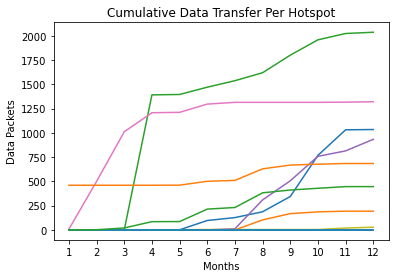

{'11fHjnKyEE9VZjVL1Vzb1YvNeCX6bHoxni6BGXEYLuDCkstdRtp': [0, 0, 0, 0, 1, 96, 30, 60, 157, 424, 263, 3], '113jUVZtEQPsqomFdSrLs1wqaqnahKvqDmrD82uSDQj4r9Lvocm': [0, 0, 0, 0, 0, 0, 0, 103, 65, 18, 7, 0], '112DhF1S6X6kpjBGyQNdFLkheoS6d4rbS5K2p1h8ri2s1TFjhcup': [0, 0, 0, 1391, 4, 75, 67, 82, 181, 158, 65, 13], '112N2tp5p5LDNJ4JmBUUqQWZg2dcqZwyaQeJE3iwpE4JjbNsVDMY': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112NjiT7watFADYn7PY7MGB9jQ1ADrpgxnf5iD45ymBnwAffDJV2': [0, 0, 0, 0, 0, 0, 12, 297, 197, 252, 56, 119], '112fGDziMbXHZB65rqEB1uu1yjqepsyKyCzgJwuZpiNMoxpVsKiu': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112eauCY3a3qHcqFBjmNnEHibur9dBdAg9ttWcgH5Jpz7RyC9dmT': [8, 492, 511, 196, 4, 85, 18, 0, 0, 0, 2, 4], '112pxgKLuR41ENX69usEaq88UfUw21eRcQHjJg12yHKWfkCqo6fE': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112DhGGDNXsSainr8a57Awyor8u5DbUKNfjAL3giqxWXu3P2TS4x': [0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 15, 9], '11yibHeh436YfSf8eDiUL16stkRXZoq2zGCVNR99Q2Hb1SoTj1A': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], '112Q9Jta7SVkvxuVz

In [6]:
import pickle
import numpy as np

with open(scen+"_dataTransfer_20mile.pkl", 'wb') as fh:
    pickle.dump(dataPerAddress, fh)

file = open("sanfranciscoCA_dataTransfer_20mile.pkl", 'rb')
loadedDPA = pickle.load(file)
len(loadedDPA)
from matplotlib import pyplot as plt
for a in range(len(loadedDPA)):    
    plt.plot(np.cumsum(list(loadedDPA.values())[a]))
    #if ((a+1) % 3 == 0) or (a == len(dataPerAddress)-1):

plt.xticks(ticks = list(range(0,12)), labels = list(range(1,13)))
plt.xlabel("Months")
plt.ylabel("Data Packets")
plt.title("Cumulative Data Transfer Per Hotspot")
#plt.legend()
plt.show()
print(loadedDPA)

miamiFL Number of hotspots: 166 
Monthly average for top 50 hotspots:  [334.92, 144.8, 360.1, 346.3, 14.5, 38.5, 86.0, 390.42, 440.42, 187.5, 203.74, 127.54]
seattleWA Number of hotspots: 159 
Monthly average for top 50 hotspots:  [65.3, 86.28, 229.82, 165.26, 13.02, 106.5, 110.3, 108.52, 204.92, 438.36, 425.4, 281.82]
norfolkVA Number of hotspots: 477 
Monthly average for top 50 hotspots:  [167.76, 168.6, 285.04, 211.38, 34.0, 161.76, 81.9, 143.0, 99.36, 78.42, 149.34, 92.48]
denverCO Number of hotspots: 396 
Monthly average for top 50 hotspots:  [483.1, 406.36, 748.94, 424.9, 43.14, 379.0, 111.4, 134.48, 142.82, 163.42, 185.46, 150.06]
topekaKS Number of hotspots: 106 
Monthly average for top 50 hotspots:  [3.98, 7.68, 5.96, 2.3, 0.36, 39.1, 6.98, 72.04, 68.22, 32.42, 24.1, 42.4]
romeGA Number of hotspots: 53 
Monthly average for top 50 hotspots:  [0.22, 0.0, 0.02, 0.0, 0.0, 0.02, 0.06, 0.18, 0.1, 0.06, 0.28, 0.08]
turlockCA Number of hotspots: 116 
Monthly average for top 50 hotspot

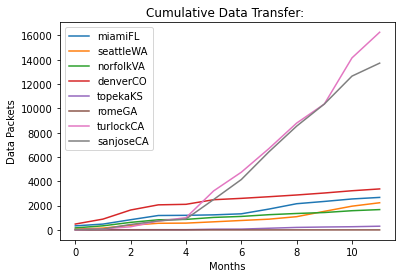

In [1]:
#This program outputs cumulative graphs of average monthly number of data packets transferred for a chosen 
 number of hotspots, per city 
import pickle
from matplotlib import pyplot as plt
import numpy as np
scens = ["miamiFL", "seattleWA", "norfolkVA", "denverCO", "topekaKS", "romeGA", "turlockCA", "sanjoseCA"]

count = 1
dict_final = {}
list_of_lists = []
num_of_hotspots = 50
for s in scens:
    file = open(s+"_dataTransfer_20mile.pkl", 'rb')
    loadedDPA = pickle.load(file)
    for key,value in loadedDPA.items():
        sum1 = sum(value)
        loadedDPA[key].append(sum1)
    loadedDPA_sorted = {k: v for k, v in sorted(loadedDPA.items(), key=lambda item: item[1][12], reverse = True)}
    dict_final.update(loadedDPA_sorted)
    
    for key in dict_final:
        if(count <= num_of_hotspots):
            list_to_plot = (dict_final[key][0:12])
            list_of_lists.append(list_to_plot)
            #print(sum(list_to_plot))
        count+=1
    
    print("%s Number of hotspots: %d " % (s, len(dict_final)))
    dict_final.clear()
    list_of_averages_per_city = [0,0,0,0,0,0,0,0,0,0,0,0]
    i = 0
    while(i<=11):
        for element in list_of_lists:
            list_of_averages_per_city[i] += element[i]
        i+=1
    list_of_averages_per_city[:] = [element / num_of_hotspots for element in list_of_averages_per_city]
    print("Monthly average for top %d hotspots: " % (num_of_hotspots), list_of_averages_per_city)
    plt.plot(np.cumsum(list_of_averages_per_city), label = s)
    list_of_averages_per_city.clear()
    count = 1
    list_of_lists.clear()
plt.title("Cumulative Data Transfer: ")
plt.xlabel("Months")
plt.ylabel("Data Packets")
plt.legend()
plt.show()